In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'sidm'

In [2]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
]

samples_4mu = [
    "4Mu_500GeV_5p0GeV_0p08mm",
]

samples_bkg = [
    "TTJets",
]

In [6]:
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_4mu_v10.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", max_files=1, location_cfg="backgrounds.yaml")

# fileset_2mu2e['4Mu_500GeV_5p0GeV_0p08mm'] = fileset_4mu['4Mu_500GeV_5p0GeV_0p08mm']
# fileset_2mu2e['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
    maxchunks=1, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

output = runner.run(fileset_2mu2e, treename="Events", processor_instance=p)

out = output["out"]

Output()

Signal not in xs cfg, assuming 1fb


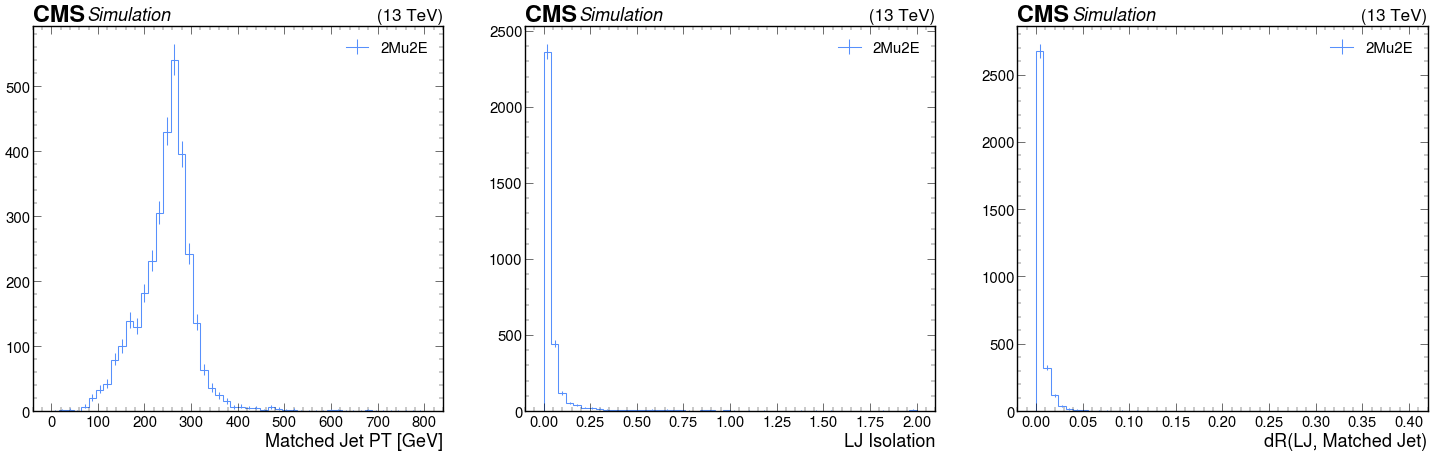

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out["2Mu2E_500GeV_5p0GeV_0p08mm"]["hists"]["matched_jet_pt"][channels[0], :], density=False, label="2Mu2E")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_2mu2e:
    utilities.plot(out["2Mu2E_500GeV_5p0GeV_0p08mm"]["hists"]["lj_isolation"][channels[0], :], density=False, label="2Mu2E")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_2mu2e:
    utilities.plot(out["2Mu2E_500GeV_5p0GeV_0p08mm"]["hists"]["matched_jet_lj_dR"][channels[0], :], density=False, label="2Mu2E")
plt.legend()

KeyError: '4Mu_500GeV_5p0GeV_0p08mm'

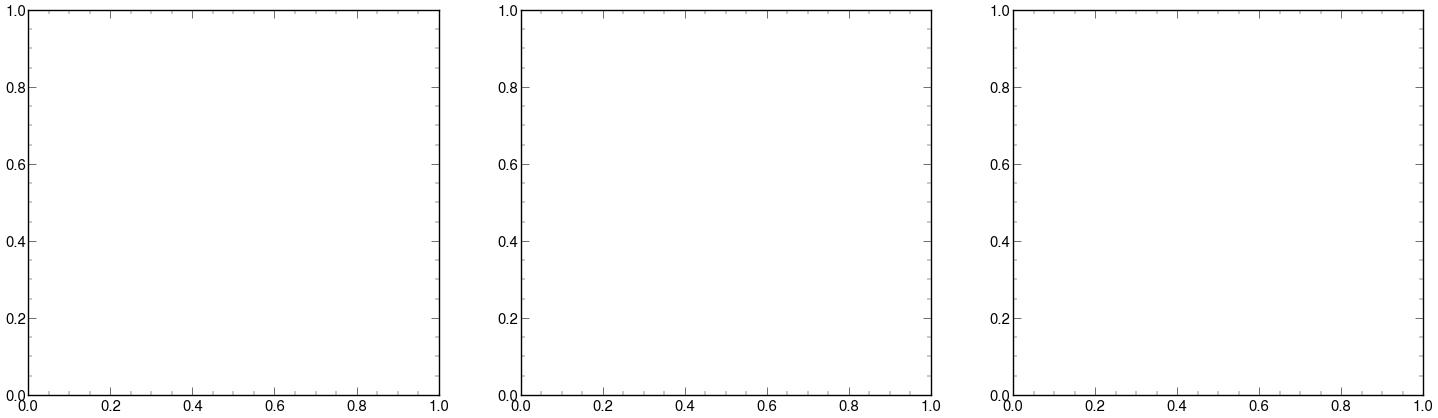

In [8]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["matched_jet_pt"][channels[0], :], density=False, label="4Mu", color="orange")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["lj_isolation"][channels[0], :], density=False, label="4Mu", color="orange")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_4mu:
    utilities.plot(out["4Mu_500GeV_5p0GeV_0p08mm"]["hists"]["matched_jet_lj_dR"][channels[0], :], density=False, label="4Mu", color="orange")
plt.legend()

In [ ]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_bkg:
    utilities.plot(out["TTJets"]["hists"]["matched_jet_pt"][channels[0], :], density=False, label="TTJets", color="green")
plt.legend()

plt.subplot(1,3,2)
for sample in samples_bkg:
    utilities.plot(out["TTJets"]["hists"]["lj_isolation"][channels[0], :], density=False, label="TTJets", color="green")
plt.legend()

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out["TTJets"]["hists"]["matched_jet_lj_dR"][channels[0], :], density=False, label="TTJets", color="green")
plt.legend()

In [ ]:
samples_all = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "TTJets",
]

In [ ]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=False)
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(1,3,2)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=False)
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")

plt.subplot(1,3,3)
for sample in samples_all:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=False)
plt.legend(samples_all, loc=1, prop={'size': 18})
plt.yscale("log")